In [45]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from keras import Input
from keras.layers import Dense, Activation, LSTM
from keras.layers import TimeDistributed as TD
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [46]:
#read dataset
df = pd.read_csv('/kaggle/input/afm346-stock-value-dataset/stocks.csv')
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,MMM,124.281319,150.501678,150.510040,148.110367,148.561874,4307633.0
1,2020-01-03,MMM,123.211121,149.205688,149.381271,146.847824,148.010040,2950412.0
2,2020-01-06,MMM,123.328491,149.347824,149.423080,147.449829,148.118729,2389608.0
3,2020-01-07,MMM,122.831367,148.745819,149.255859,147.842804,149.063538,2598908.0
4,2020-01-08,MMM,124.716301,151.028427,151.755859,148.536789,148.829437,3298927.0
...,...,...,...,...,...,...,...,...
568385,2024-06-24,ZTS,171.839996,171.839996,174.289993,170.300003,171.710007,1885900.0
568386,2024-06-25,ZTS,167.979996,167.979996,172.419998,167.720001,171.789993,2293400.0
568387,2024-06-26,ZTS,170.899994,170.899994,171.509995,166.449997,167.210007,2053800.0
568388,2024-06-27,ZTS,176.460007,176.460007,181.660004,174.259995,174.490005,4164700.0


# **Webscape Recent Records**

In [47]:
'''!pip3 install yfinance 

# Import all the necessary libraries for web scraping and data analysis
import requests
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf

# Step 1: Web Scraping for Company Details
def scrape_company_details():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'id': 'constituents'})
    rows = table.find_all('tr')[1:]  # Skip the header row

    companies = []
    for row in rows:
        cols = row.find_all('td')
        ticker_symbol = cols[0].text.strip()
        company_name = cols[1].text.strip()
        companies.append([company_name, ticker_symbol])

    return pd.DataFrame(companies, columns=['Company Name', 'Ticker Symbol'])

# Step 2: Fetch historical data for each symbol
def fetch_stock_data(symbols, start_date, end_date):
    data_list = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        hist = stock.history(start=start_date, end=end_date)

        for date, row in hist.iterrows():
            data_list.append({
                'Date': date.strftime('%Y-%m-%d'),
                'Symbol': symbol,
                'Adj Close': row['Close']  # Adjusted Close
            })

    return pd.DataFrame(data_list)

# Define the date range
start_date = '2024-07-11'
end_date = '2024-07-18'

# Step 3: Integrate the scraping and data fetching
def main():
    # Scrape the list of S&P 500 companies
    sp500_df = scrape_company_details()
    sp500_symbols = sp500_df['Ticker Symbol'].tolist()

    # Fetch stock data for the specified date range
    stock_data_df = fetch_stock_data(sp500_symbols, start_date, end_date)

    # Save the data to a CSV file
    stock_data_df.to_csv('sp500_stock_prices.csv', index=False)
    print("Data has been saved to sp500_stock_prices.csv")

if __name__ == "__main__":
    main()
'''

'!pip3 install yfinance \n\n# Import all the necessary libraries for web scraping and data analysis\nimport requests\nimport pandas as pd\nfrom bs4 import BeautifulSoup\nimport yfinance as yf\n\n# Step 1: Web Scraping for Company Details\ndef scrape_company_details():\n    url = \'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies\'\n    response = requests.get(url)\n    soup = BeautifulSoup(response.text, \'html.parser\')\n    table = soup.find(\'table\', {\'id\': \'constituents\'})\n    rows = table.find_all(\'tr\')[1:]  # Skip the header row\n\n    companies = []\n    for row in rows:\n        cols = row.find_all(\'td\')\n        ticker_symbol = cols[0].text.strip()\n        company_name = cols[1].text.strip()\n        companies.append([company_name, ticker_symbol])\n\n    return pd.DataFrame(companies, columns=[\'Company Name\', \'Ticker Symbol\'])\n\n# Step 2: Fetch historical data for each symbol\ndef fetch_stock_data(symbols, start_date, end_date):\n    data_list = []\n\n

In [48]:
#read dataset
df1=pd.read_csv('/kaggle/input/s-and-p-500-stocks-july-1st-to-19th-2024/sp500_stock_prices.csv')
df1

,Date,Symbol,Adj Close
0,2024-07-01,MMM,100.610001
1,2024-07-02,MMM,101.620003
2,2024-07-03,MMM,101.620003
3,2024-07-05,MMM,101.320000
4,2024-07-08,MMM,101.099998
...,...,...,...
7005,2024-07-15,ZTS,177.557648
7006,2024-07-16,ZTS,182.475967
7007,2024-07-17,ZTS,181.617996
7008,2024-07-18,ZTS,179.229996


In [49]:
# Ensure the DataFrame is sorted by ticker 'Symbol' and 'Date'
df = df.sort_values(by=['Symbol', 'Date'])

# Create a new column 'lag7' with 7-day lagged closing value within each ticker
df['lag7'] = df.groupby('Symbol')['Adj Close'].shift(7)

In [50]:
# Create Rolling Average adj price and rolling standard deviation attributes
df['rolling_avg_adj_price'] = df.groupby('Symbol')['Adj Close'].rolling(window=30, min_periods = 1).mean().reset_index(level=0, drop=True)
df['rolling_std_price'] = df.groupby('Symbol')['Adj Close'].rolling(window=30, min_periods = 1).std().reset_index(level=0, drop=True)

# **Creating Prediction Models for UBER**

In [51]:
# Filter for stocks similar to UBER
df_UBER = df[df['Symbol'] == "UBER"]
df_DAL = df[df['Symbol'] == "DAL"]
df_CSX = df[df['Symbol'] == "CSX"]

In [52]:
lst = [df_UBER, df_DAL, df_CSX] 
def sevenday_and_std(lst):
    for item in lst:
        item['7day_pct_return'] = (item['Adj Close']-item['lag7'])/item['lag7']
        item['rolling_std_7dayreturn'] = item['7day_pct_return'].rolling(window=30, min_periods =1).std()
        item['lag7_pct_return'] = item['7day_pct_return'].shift(7)
sevenday_and_std(lst)

/tmp/ipykernel_33/2085034395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['7day_pct_return'] = (item['Adj Close']-item['lag7'])/item['lag7']
/tmp/ipykernel_33/2085034395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['rolling_std_7dayreturn'] = item['7day_pct_return'].rolling(window=30, min_periods =1).std()
/tmp/ipykernel_33/2085034395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [53]:
# Merge similar companies with main stock 
df_UBER = pd.merge(df_UBER, df_DAL[['Date', 'lag7', 'rolling_avg_adj_price','rolling_std_price','lag7_pct_return','rolling_std_7dayreturn']], on='Date', how='left', suffixes=('','_DAL'))
df_UBER = pd.merge(df_UBER, df_CSX[['Date', 'lag7', 'rolling_avg_adj_price','rolling_std_price','lag7_pct_return','rolling_std_7dayreturn']], on='Date', how='left', suffixes=('','_CSX'))

In [54]:
df_UBER = df_UBER.dropna()

# **UBER: Multi-Linear Regression Model for Adj Close Price**

In [55]:
# Define features and target
Y = df_UBER['Adj Close']
X = df_UBER[['lag7', 'lag7_CSX', 'lag7_DAL', 'lag7_pct_return_CSX', 'lag7_pct_return_DAL']]

# Initialize and fit the model
model_linear_UBER = LinearRegression()
model_linear_UBER.fit(X, Y)

scores = cross_val_score(model_linear_UBER, X, Y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE = ",-np.mean(scores))
print("Root MSE= ", (-np.mean(scores)) ** (1/2))

Cross-validation MSE =  12.724298917489154
Root MSE=  3.5671135274180936


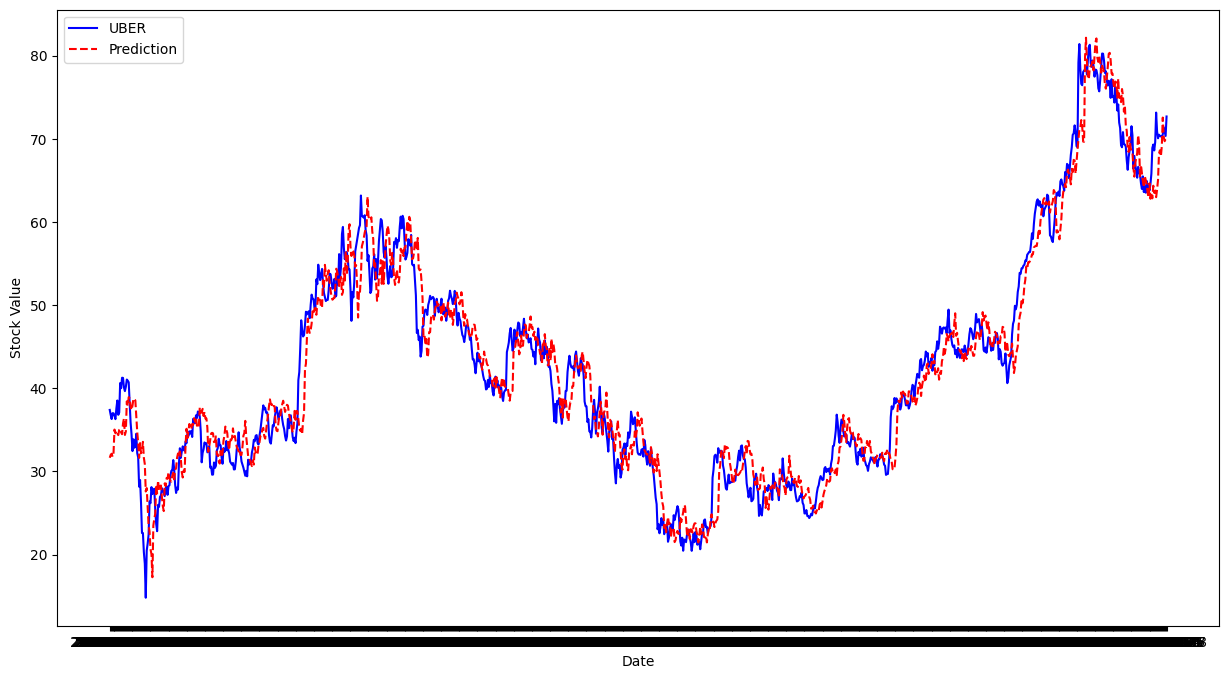

In [56]:
#Graphing the model
Y_pred = model_linear_UBER.predict(X)

plt.figure(figsize=(15, 8))
plt.plot(df_UBER['Date'], Y, color='blue', label='UBER')
plt.plot(df_UBER['Date'], Y_pred, color='red', linestyle='--', label='Prediction')
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.legend()
plt.show()

In [57]:
# Predict Y over X using the fitted model
Y_pred = model_linear_UBER.predict(X)

In [58]:
# R-squared
print("R-squared:", r2_score(Y, Y_pred))

# Mean Absolute Error
print("Mean Absolute Error:", mean_absolute_error(Y, Y_pred))

# Mean Squared Error
print("Mean Squared Error:", mean_squared_error(Y, Y_pred))

# Root Mean Squared Error
print("Root Mean Squared Error:", mean_squared_error(Y, Y_pred, squared=False))

R-squared: 0.9432957200002996
Mean Absolute Error: 2.5297381694284105
Mean Squared Error: 11.19254898477048
Root Mean Squared Error: 3.34552671260752


# **UBER: KNN Regressor**

In [59]:
# Set X and Y variables 
Y = df_UBER['Adj Close']
X = df_UBER[['lag7', 'lag7_DAL', 'lag7_CSX', 'lag7_pct_return_DAL', 'lag7_pct_return_CSX']]

In [60]:
# Fitting the KNN Regression model with k=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X,Y)

KNeighborsRegressor()

In [61]:
scores = cross_val_score(knn_reg, X, Y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE = ",-np.mean(scores))
print("Root MSE= ", (-np.mean(scores)) ** (1/2))

Cross-validation MSE =  53.33940943054866
Root MSE=  7.303383423492749


# **UBER: Creating Class - Risky Vs Unrisky**

In [62]:
df_UBER['rolling_std_7dayreturn'].describe()

count    1116.000000
mean        0.077313
std         0.043202
min         0.025491
25%         0.047377
50%         0.073323
75%         0.091928
max         0.286309
Name: rolling_std_7dayreturn, dtype: float64

In [63]:
df_UBER['Risky'] = df_UBER['rolling_std_7dayreturn'].apply(lambda x: "Risky" if x > 0.073323 else "Unrisky") 

# **UBER: KNN Classification**

In [64]:
# Set X and Y variables 
Y = df_UBER['Risky']
X = df_UBER[['lag7', 'lag7_DAL', 'lag7_CSX', 'lag7_pct_return_DAL', 'lag7_pct_return_CSX']]

In [65]:
# Fitting the KNN Classifier model with k=5
knn_UBER = KNeighborsClassifier(n_neighbors=5)
knn_UBER.fit(X,Y)

KNeighborsClassifier()

In [66]:
Y_pred = knn_UBER.predict(X)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(Y,Y_pred))

Accuracy =  0.921146953405018


# **UBER: Random Forest Classification**

In [67]:
# Set X and Y variables 
Y = df_UBER['Risky']
X = df_UBER[['lag7', 'lag7_DAL', 'lag7_CSX', 'lag7_pct_return_DAL', 'lag7_pct_return_CSX']]

In [68]:
# Create Random Forest classifier and fit the model
model = RandomForestClassifier(n_estimators=4, max_depth=6)
model.fit(X,Y)

RandomForestClassifier(max_depth=6, n_estimators=4)

In [69]:
# Score
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print('Cross-validation accuracy =',np.mean(scores))

Cross-validation accuracy = 0.5197069186418962


# **Stock Price Prediction Using Multi-Linear Regression**

In [70]:
df_predict = pd.read_csv('/kaggle/input/july-sp500-prices/sp500_stock_prices.csv')
df_predict

,Date,Symbol,Adj Close
0,2024-07-11,MMM,103.230003
1,2024-07-12,MMM,104.040001
2,2024-07-15,MMM,102.720001
3,2024-07-16,MMM,103.309998
4,2024-07-17,MMM,104.639999
...,...,...,...
2500,2024-07-11,ZTS,177.318237
2501,2024-07-12,ZTS,178.615128
2502,2024-07-15,ZTS,177.557648
2503,2024-07-16,ZTS,182.475967


In [71]:
# Ensure the DataFrame is sorted by ticker 'Symbol' and 'Date'
df_predict = df_predict.sort_values(by=['Symbol', 'Date'])

# Create a new column 'lag7' with 7-day lagged closing value within each ticker
df_predict['lag4'] = df_predict.groupby('Symbol')['Adj Close'].shift(4)

In [72]:
# Filter for stocks similar to UBER
df_UBER = df_predict[df_predict['Symbol'] == "UBER"]
df_DAL = df_predict[df_predict['Symbol'] == "DAL"]
df_CSX = df_predict[df_predict['Symbol'] == "CSX"]

lst = [df_UBER, df_DAL, df_CSX] 
def fourday_and_std(lst):
    for item in lst:
        item['4day_pct_return'] = (item['Adj Close']-item['lag4'])/item['lag4']
fourday_and_std(lst)

# Merge similar companies with main stock 
df_UBER = pd.merge(df_UBER, df_DAL[['Date', 'lag4','4day_pct_return']], on='Date', how='left', suffixes=('','_DAL'))
df_UBER = pd.merge(df_UBER, df_CSX[['Date', 'lag4','4day_pct_return']], on='Date', how='left', suffixes=('','_CSX'))

df_UBER = df_UBER.dropna()

first_row_list = df_UBER.iloc[0].tolist()
first_row_list = first_row_list[2:]
first_row_list

x_var = [[first_row_list[0], first_row_list[3], first_row_list[5], first_row_list[4], first_row_list[6]]]

predicted = model_linear_UBER.predict(x_var)
predicted = predicted[0]

pct_return = (predicted - first_row_list[0])/(first_row_list[0])
pct_return

# predict risky or not
predicted_risky = knn_UBER.predict(x_var)
predicted_risky = predicted_risky[0]
predicted_risky

print(pct_return,predicted_risky)

0.019046375373390274 Unrisky


/tmp/ipykernel_33/3624344768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['4day_pct_return'] = (item['Adj Close']-item['lag4'])/item['lag4']
/tmp/ipykernel_33/3624344768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['4day_pct_return'] = (item['Adj Close']-item['lag4'])/item['lag4']
/tmp/ipykernel_33/3624344768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

# **Neural Network Models - Mutiple Stocks from Various Industries**

In [73]:
df = pd.read_csv('/kaggle/input/afm346-stock-value-dataset/stocks.csv')
df = df.sort_values(by=['Symbol', 'Date'])

# We consider a week consisting of 5 working days
# Weekly return refers to the percentage of rise of price after 5 working days
# Note that it doesn't have to be an entire week, we would consider every continuous 5 working days
lag_days = 5

df['lag%d' % lag_days] = df.groupby('Symbol')['Adj Close'].shift(lag_days)
df['Daily_Return_pct'] = df['Adj Close'].pct_change() * 100
df['Weekly_Return_pct'] = (df['Adj Close'] - df['lag%d' % lag_days]) / df['lag%d' % lag_days] * 100

/tmp/ipykernel_33/217845809.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily_Return_pct'] = df['Adj Close'].pct_change() * 100


In [74]:
companies = ['CRM', 'UBER', 'CMG', 'KHC', 'EL', 'EXPE']

# Get the stock price information for only these 6 companies
df_company = {}
for company in companies:
    df_company[company] = df.loc[df['Symbol'] == company]

In [75]:
# Get all Adj Closing price of the companies and place them into an 2d-array
price_arr = []
for company in companies:
    price_arr.append(np.asarray(df_company[company]['Adj Close']).reshape(-1, 1))
price_arr = np.concatenate(price_arr, axis=1)
price_arr.shape

(1130, 6)

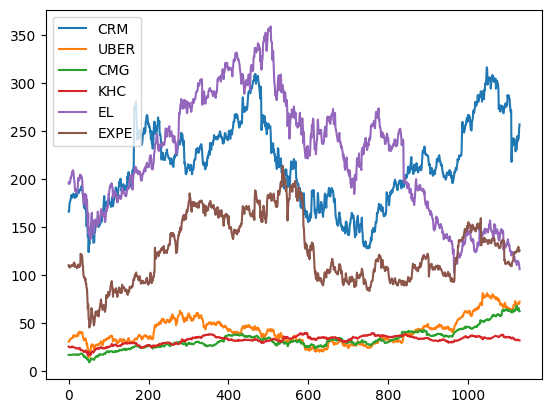

In [76]:
# Plot the stock price of all 6 companies
plt.plot(price_arr, label=companies)
plt.legend()

In [77]:
# Standardize the price
scaler = StandardScaler()
scaler.fit(price_arr)
price_scaled = scaler.transform(price_arr)

In [78]:
# Prepare the input and output data for this LSTM
# Similarly, we should create all subsequences with length 60 of input and output

days = 60 # the length of all subsequences
cnt = price_arr.shape[0] - days - lag_days # the total number of all subsequences
# X -- the input, this day's stock price
# Y -- the output, the stock price 5 days later
X = np.zeros((cnt*6, days, 1), dtype=float)
Y = np.zeros((cnt*6, days, 1), dtype=float)
for i in range(cnt):
    for j in range(6):
        # The data are placed in a cycle of 6
        # The first row is for CRM, the second row for UBER, and so on, then the 7th row is for CRM again, ...
        X[i*6+j, :, 0] = price_scaled[i:i+days, j]
        Y[i*6+j, :, 0] = price_scaled[i+lag_days:i+days+lag_days, j]

In [79]:
def get_lstm_model(input_dim): # create an LSTM model with input_dim as the dimension for the input
    model = Sequential()

    model.add(Input((None, input_dim)))
    model.add(LSTM(16, return_sequences=True))
    model.add(TD(Dense(16)))
    model.add(TD(Activation('tanh')))
    model.add(TD(Dense(4)))
    model.add(TD(Activation('tanh')))
    model.add(TD(Dense(1)))

    model.compile(loss='mse', optimizer='adam')
    return model

In [80]:
def train_models(X, Y, cv=5):
    # Copy the arrays for backup
    X_copy, Y_copy = X.copy(), Y.copy()
    # Shuffle them
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X_copy = X_copy[idx]
    Y_copy = Y_copy[idx]
    
    # Create folds
    X_slice, Y_slice = [], []
    l = int(np.ceil(X.shape[0] / cv))
    for i in range(cv):
        X_slice.append(X_copy[i*l:min((i+1)*l, X.shape[0])])
        Y_slice.append(Y_copy[i*l:min((i+1)*l, X.shape[0])])
        
    models = []
    loss = []
    # Train a model for each fold
    for i in range(cv):
        model = get_lstm_model(1)
        
        # The validation data is the i-th subset
        X_val, Y_val = X_slice[i], Y_slice[i]
        # The rest is for training
        X_train = np.concatenate(X_slice[:i] + X_slice[i+1:])
        Y_train = np.concatenate(Y_slice[:i] + Y_slice[i+1:])
        
        print('Model id:', i+1)
        # Train the model
        history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_val, Y_val))
        loss.append(history.history['loss'][-1] * .8 + history.history['val_loss'][-1] * .2) # the overall MSE is the combined loss
        
        models.append(model)
    
    return models, loss

In [81]:
models, loss = train_models(X, Y)

Model id: 1
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 0.3170 - val_loss: 0.0847
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0849 - val_loss: 0.0651
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0685 - val_loss: 0.0579
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0626 - val_loss: 0.0544
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0572 - val_loss: 0.0509
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0550 - val_loss: 0.0492
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0529 - val_loss: 0.0488
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0513 - val_loss: 0.0473
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0502 - val_loss: 0.0467
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0495 - val_loss: 0.0461
Model id: 2
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - loss: 0.4489 - val_loss: 0.1607
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 

In [82]:
# Test its accuracy using all training and validating data
# Note that, when testing the accuracy, we only use the end of all subsequences
# (i.e., we only test the accuracy of predictions based on all 60 previous data)
# During model training and validation, for calculating loss, it might use all 60 predictions for each subsequence

list_Y_pred = []
for model in models:
    list_Y_pred.append(model.predict(X)[:, -1, 0])

Y_pred = np.mean(np.array(list_Y_pred), axis=0)
Y_pred_for_stock = np.array([Y_pred[i::6] for i in range(6)]).T # be in the same shape as price_arr
price_pred = scaler.inverse_transform(Y_pred_for_stock)
price_real = price_arr[days+lag_days:]

200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [83]:
def print_accuracy(real, pred):
    print('MSE:', mean_squared_error(real, pred, squared=True))
    print('RMSE:', mean_squared_error(real, pred, squared=False))
    print('R squared:', r2_score(real, pred))

In [84]:
print('Accuracy for price')
print('Overall')
print_accuracy(price_real, price_pred)
print()

for i in range(6):
    print(companies[i])
    print_accuracy(price_real[:, i], price_pred[:, i])
    print()

Accuracy for price
Overall
MSE: 63.810322174412136
RMSE: 6.493811485389684
R squared: 0.94084351704057

CRM
MSE: 158.04924400751216
RMSE: 12.571763758817303
R squared: 0.9165528687505473

UBER
MSE: 9.65877715142015
RMSE: 3.1078573248172363
R squared: 0.9514677164929053

CMG
MSE: 3.230059603466167
RMSE: 1.7972366576125045
R squared: 0.969778888572702

KHC
MSE: 1.2417981081491054
RMSE: 1.1143599544801963
R squared: 0.908628464972032

EL
MSE: 131.02857072302822
RMSE: 11.446771192044865
R squared: 0.966683019607506

EXPE
MSE: 79.65348345289706
RMSE: 8.924880024565992
R squared: 0.9319501438477271

